# Clustering Crypto

In [217]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [218]:
# Load the crypto_data.csv dataset.
# YOUR CODE HERE
file_path = "crypto_data.csv"
crypto_df = pd.read_csv(file_path, index_col="Unnamed: 0")
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [219]:
crypto_df.shape
crypto_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [220]:
# Keep all the cryptocurrencies that are being traded.
# YOUR CODE HERE
crypto_df=crypto_df.loc[crypto_df['IsTrading'] != False]
#crypto_df.count()
crypto_df.shape


(1144, 6)

In [221]:
# Remove the "IsTrading" column. 
# YOUR CODE HERE
crypto_df = crypto_df.drop(['IsTrading'], axis=1)
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [222]:
# Remove rows that have at least 1 null value.
# YOUR CODE HERE
crypto_df = crypto_df.dropna()
crypto_df.shape
#crypto_df.head()

(685, 5)

In [223]:
# Keep the rows where coins are mined.
# YOUR CODE HERE
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] > 0]
crypto_df.shape

(532, 5)

In [224]:
# Create a new DataFrame that holds only the cryptocurrencies names.
# YOUR CODE HERE
coinname_df = crypto_df.copy()
coinname_df.drop(columns=["Algorithm","ProofType","TotalCoinsMined","TotalCoinSupply"], inplace=True)
print(coinname_df.shape)
coinname_df.head()

(532, 1)


,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [225]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
# YOUR CODE HERE
crypto_df.drop(columns=["CoinName"], inplace=True)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [226]:
# Use get_dummies() to create variables for text features.
# YOUR CODE HERE
X_dummy = pd.get_dummies(crypto_df[['Algorithm','ProofType']])
X_dummy.insert(0,"TotalCoinsMined"," ")
X_dummy["TotalCoinsMined"]=crypto_df["TotalCoinsMined"]
X_dummy.insert(1,"TotalCoinSupply"," ")
X_dummy["TotalCoinSupply"]=crypto_df["TotalCoinSupply"]
X_dummy.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
# Standardize the data with StandardScaler().
# YOUR CODE HERE
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
scaler = StandardScaler().fit(X_dummy)
X_scaled= scaler.transform(X_dummy)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [228]:
# Using PCA to reduce dimension to three principal components.
# YOUR CODE HERE
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(X_scaled)
crypto_pca

array([[-0.33391162,  0.9800556 , -0.50056128],
       [-0.31726254,  0.98014514, -0.50071098],
       [ 2.30373403,  1.63561493, -0.62966332],
       ...,
       [ 0.31854293, -2.2307297 ,  0.42329628],
       [-0.15962787, -2.09868946,  0.35978882],
       [-0.28502149,  0.75567675, -0.18683979]])

In [229]:
# Create a DataFrame with the three principal components.
# YOUR CODE HERE
crypto_pca_df = pd.DataFrame(crypto_pca, index=crypto_df.index, columns=["PCA1","PCA2","PCA3"])
print(crypto_pca_df.shape)
crypto_pca_df.head()

(532, 3)


,PCA1,PCA2,PCA3
42,-0.333912,0.980056,-0.500561
404,-0.317263,0.980145,-0.500711
1337,2.303734,1.635615,-0.629663
BTC,-0.148932,-1.281078,0.163887
ETH,-0.153148,-2.007656,0.380094


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [230]:
# Create an elbow curve to find the best value for K.
# YOUR CODE HERE
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [231]:
# Initialize the K-Means model.
# YOUR CODE HERE
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
# YOUR CODE HERE
model.fit(crypto_pca_df)

# Predict clusters
# YOUR CODE HERE
predictions = model.predict(crypto_pca_df)

predictions

array([0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0,

In [234]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
# YOUR CODE HERE
crypto_df.reset_index()

clustered_df = pd.concat([crypto_df, crypto_pca_df,coinname_df],axis=1)
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# YOUR CODE HERE
#clustered_df["CoinName"]=coinname_df["CoinName"]

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
# YOUR CODE HERE
clustered_df["Class"]= predictions
# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PCA1,PCA2,PCA3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.333912,0.980056,-0.500561,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.317263,0.980145,-0.500711,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.303734,1.635615,-0.629663,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.148932,-1.281078,0.163887,Bitcoin,3
ETH,Ethash,PoW,1.076842e+08,0,-0.153148,-2.007656,0.380094,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.165716,-1.154148,0.061517,Litecoin,3
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.400743,1.293045,-0.598606,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.144842,-2.199123,0.434907,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.151591,-2.007760,0.380095,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.159627,-2.098689,0.359789,ZCash,3


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

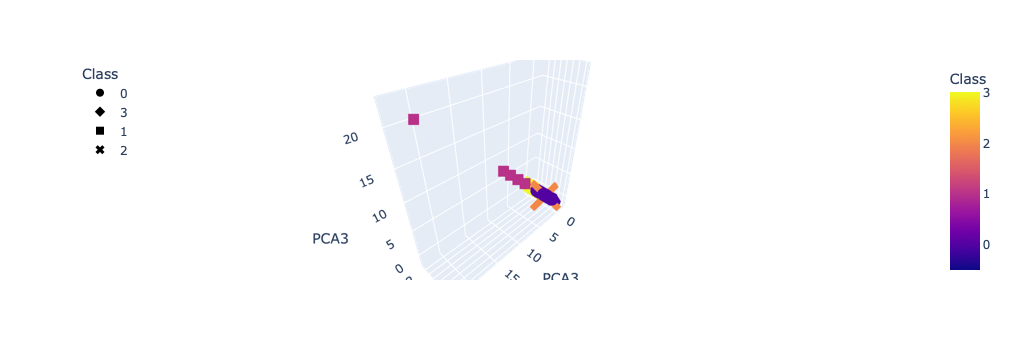

In [248]:
# Creating a 3D-Scatter with the PCA data and the clusters
# YOUR CODE HERE
import plotly.express as px
fig = px.scatter_3d(
   clustered_df,
    x="PCA3",
    y="PCA2",
    z="PCA3",
    color="Class",
    symbol="Class",
    width=800,
    hover_name = "CoinName",
    hover_data= {"Algorithm":True}
    
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [250]:
# Create a table with tradable cryptocurrencies.
# YOUR CODE HERE
clustered_df.hvplot.table(columns=['CoinName','Algorithm','ProofType','TotalCoinSupply','TotalCoinsMined','Class'],sortable=True,selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [260]:
# Print the total number of tradable cryptocurrencies.
# YOUR CODE HERE
print(f"There are {len(clustered_df)} tradeable cryptocurrencies.")

There are 532 tradeable cryptocurrencies.


In [270]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE
X=clustered_df[["TotalCoinSupply","TotalCoinsMined"]]
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X,y=None)
X

,TotalCoinSupply,TotalCoinsMined
42,4.200000e-11,0.000000e+00
404,5.320000e-04,1.065855e-03
1337,3.141593e-01,2.957551e-02
BTC,2.100000e-05,1.810842e-05
ETH,0.000000e+00,1.087731e-04
...,...,...
ZEPH,2.000000e-03,2.020225e-03
GAP,2.500000e-04,1.508199e-05
BDX,1.400223e-03,9.901351e-04
ZEN,2.100000e-05,7.370282e-06


In [271]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE
temp=clustered_df[["CoinName","Class"]]
plot_df = pd.concat([X, temp],axis=1)

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,3
ETH,0.000000e+00,0.000109,Ethereum,3
LTC,8.400000e-05,0.000064,Litecoin,3
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,3
ETC,2.100000e-04,0.000115,Ethereum Classic,3
ZEC,2.100000e-05,0.000007,ZCash,3


In [274]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE
plot_df.hvplot.scatter(x='TotalCoinsMined', y='TotalCoinSupply', by='Class', 
                  legend='right', height=400, width=600, hover_cols=["CoinName"])

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)